In [1]:
import model.net as net
import torch
from util import *
import numpy as np
from sklearn.manifold import TSNE
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

# Loading trained word embedder

In [2]:
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
EMBED_DIM = 100
model = net.net(n_letters, 256, 3, 2, EMBED_DIM)
model.load_state_dict(torch.load("model.pth"))
model.eval()
model.to(device)
embedder = model.get_embed()

# Utility functions for visualization words embeddings using t-sne

In [3]:
def embed_word(word):
    embed_tensor = embedder(sentToTensor("Polska").to(device))
    embed_numpy = embed_tensor.cpu().detach().numpy().reshape(1, EMBED_DIM)
    return embed_numpy

def embed_words(words):
    return [embed_word(word) for word in words]

def concat_words(words):
    return np.concatenate(words, axis = 0)

def tsne(words):
    X_embedded = TSNE(n_components=2).fit_transform(concat_words(embed_words(words)))
    return X_embedded

def vector_plot(words):
    X_embedded = tsne(words)
    origin = [0], [0]
    X_embedded = preprocessing.normalize(X_embedded)
    plt.quiver(*origin, X_embedded[:,0], X_embedded[:,1], angles='xy', scale_units='xy', scale=1)
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    for i in range(X_embedded.shape[0]):
        plt.text(X_embedded[i,0], X_embedded[i,1], words[i], fontsize=20)
    plt.show()
    
def point_plot(words):
    X_embedded = tsne(words)
    origin = [0], [0]
    plt.plot(X_embedded[:,0], X_embedded[:,1], 'ro')
    for i in range(X_embedded.shape[0]):
        plt.text(X_embedded[i,0]+1, X_embedded[i,1]+1, words[i], fontsize=20)
    plt.show()

## Experiments:

#### W(tata) - W(mama) ≈ W(syn) - W(corka)

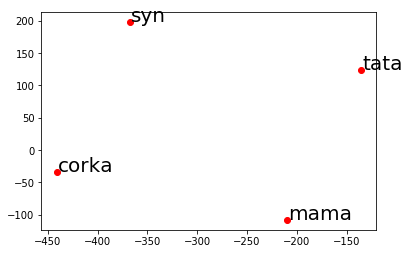

In [147]:
point_plot(['tata', 'mama', 'syn', 'corka'])

#### W(królowa) - W(król) ≈ W(kobieta) - W(mężczyzna)

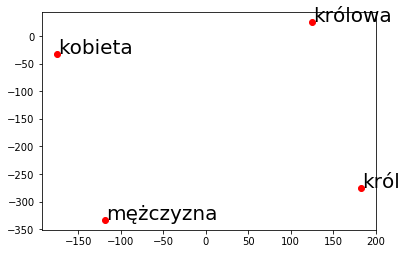

In [162]:
point_plot(['król', 'królowa', 'kobieta', 'mężczyzna'])

### No clear pattern between male vs female names

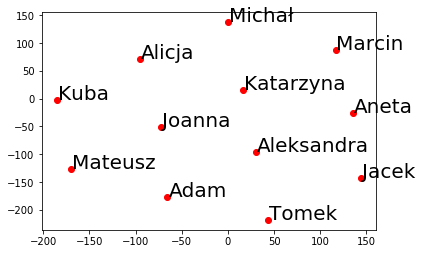

In [169]:
point_plot(['Aleksandra', 'Katarzyna', 'Joanna', 'Alicja', 'Aneta', 'Tomek', 'Mateusz', 'Kuba', 'Jacek', 'Michał', 'Adam', 'Marcin'])

### Opposites

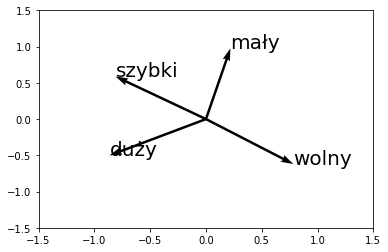

In [71]:
vector_plot(['duży', 'mały', 'szybki', 'wolny'])

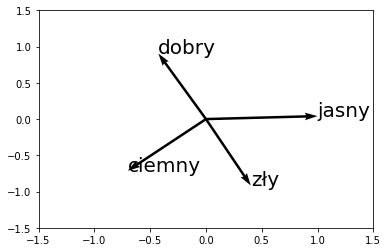

In [77]:
vector_plot(['zły', 'dobry', 'jasny', 'ciemny'])

### Synonymy

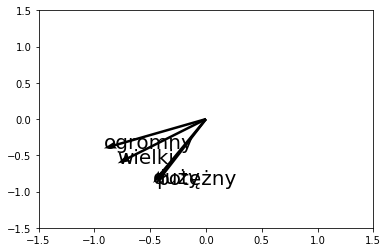

In [68]:
vector_plot(['duży', 'wielki', 'ogromny', 'potężny'])

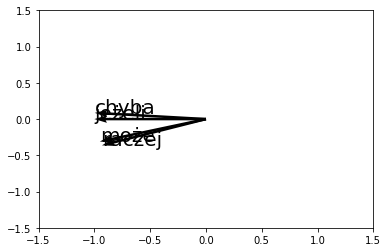

In [63]:
vector_plot(['może', 'chyba', 'raczej', 'jeżeli'])

## Hyponyms

### vehicles vs animals

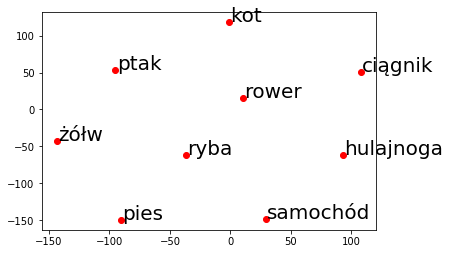

In [91]:
point_plot(['samochód', 'rower', 'ciągnik', 'hulajnoga', 'kot', 'pies', 'ryba', 'żółw', 'ptak'])

### move vs animals

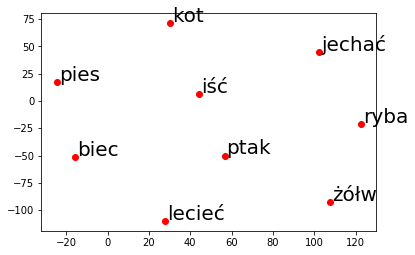

In [111]:
point_plot(['iść', 'biec', 'lecieć', 'jechać', 'kot', 'pies', 'ryba', 'żółw', 'ptak'])

### Similiar words

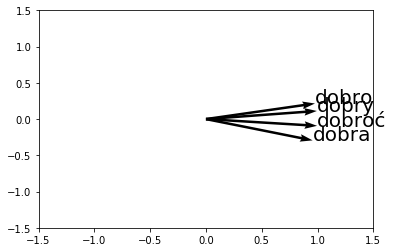

In [50]:
vector_plot(['dobry', 'dobro', 'dobroć', 'dobra'])

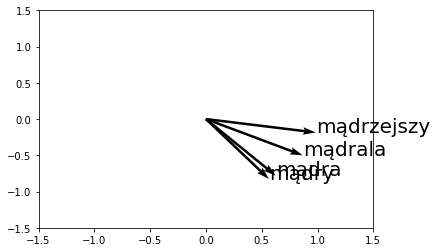

In [51]:
vector_plot(['mądry', 'mądrala', 'mądrzejszy', 'mądra'])

### Random words

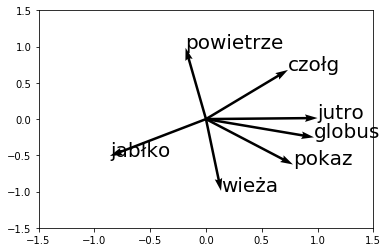

In [58]:
vector_plot(['jutro', 'czołg', 'powietrze', 'globus', 'pokaz', 'jabłko', 'wieża'])

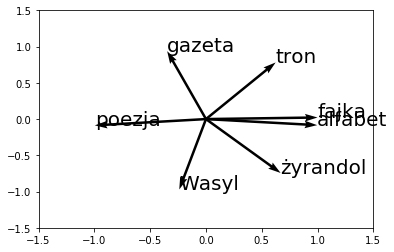

In [59]:
vector_plot(['gazeta', 'alfabet', 'poezja', 'żyrandol', 'Wasyl', 'tron', 'fajka'])